In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [37]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [38]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
#Checking which are categorical, which are not.
#Also, checking the continuous columns if binning is necessary to (?normalise the data).

Parch_vals = train['Parch'].unique()
Pclass_vals = train['Pclass'].unique()
Age_vals = train['Age'].unique()
Ticket_vals = train['Ticket'].unique()
Fare_vals = train['Fare'].unique()
Cabin_vals = train['Cabin'].unique()
Embarked_vals = train['Embarked'].unique()

print("Parch_vals: ", Parch_vals)
print("Pclass_vals: ", Pclass_vals)
print("Age_vals: ", Age_vals)
print("Ticket_vals: ", Ticket_vals)
print("Fare_vals: ", Fare_vals)
print("Cabin_vals: ", Cabin_vals)
print("Embarked_vals: ", Embarked_vals)

Parch_vals:  [0 1 2 5 3 4 6]
Pclass_vals:  [3 1 2]
Age_vals:  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Ticket_vals:  ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' 

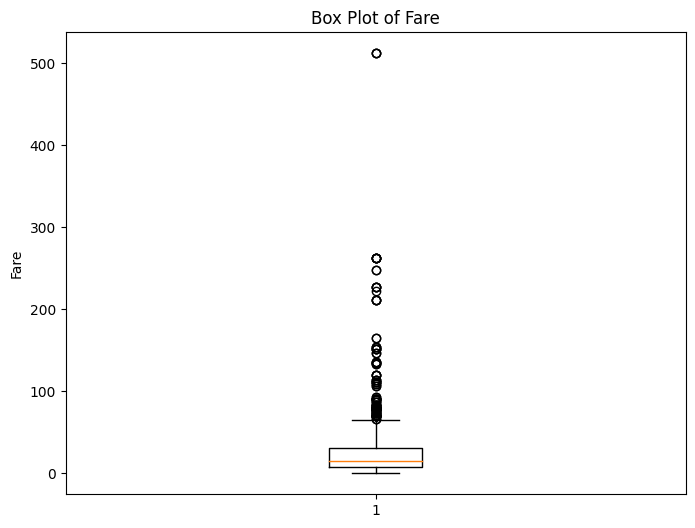

In [40]:
#Check if there are any outliers in the continuous data.

import matplotlib.pyplot as plt

def plot_box(df, column_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column_name].dropna())
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()


plot_box(train, 'Fare')

In [41]:
#These are incredibly large outliers. Let us remove them.
train = train[train['Fare'] < 300]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


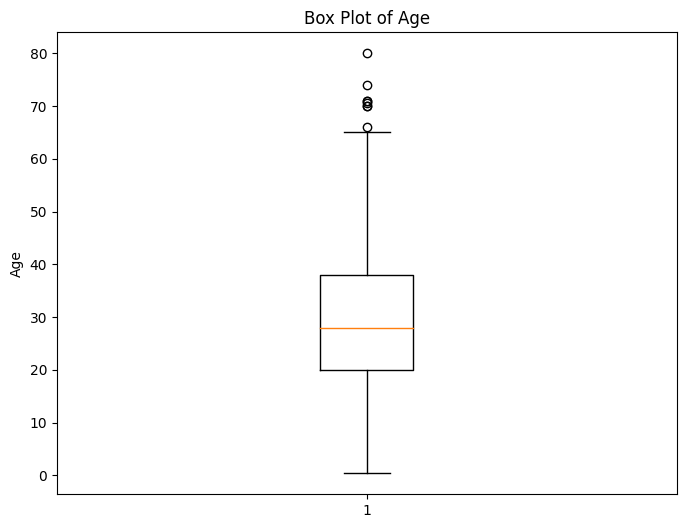

In [42]:
plot_box(train, 'Age')

In [43]:
#From prev cell for checking unique values, Notice that some tickets have prefixes. perhaps, these prefixes contain some sort of information.
#Hence, we will encode the prefixes for the model to use as data.

import re
def add_ticket_prefix_column(df):

    
    # Function to check if the ticket has an alphabetic prefix
    def has_alphabetic_prefix(ticket):
        # Split the ticket by the first space
        parts = ticket.split(' ', 1)
        if len(parts) > 1:
            prefix = parts[0]
            # Split prefix by '/' and take the first part
            prefix_before_slash = prefix.split('/')[0]
            # Check if the prefix contains alphabetic characters
            return int(any(char.isalpha() for char in prefix_before_slash))
        return 0
    
    # Apply the function to create the new column
    df['ticket_w_prefix'] = df['Ticket'].apply(has_alphabetic_prefix)
    
    return df


In [44]:
#Perform encoding on the rest of the columns into some categorical values.

def convert_boolean_to_int(df):
    # Convert all boolean columns to integers (0 or 1)
    boolean_cols = df.select_dtypes(include='bool').columns
    df[boolean_cols] = df[boolean_cols].astype(int)
    
    return df


#Notice that some of the names have titles. Titles may contain some information as well.
#We will create a new feature 'title' as a categorical feature, and then drop the 'name' afterwards.
def encode_title_binary(data):
    # Extract titles using a raw string for the regex pattern
    data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    
    # Simplify titles
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
                                           'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master'], 'Rare')
    data['Title'] = data['Title'].fillna('Unknown')

    
    # Binary encoding for titles
    title_dummies = pd.get_dummies(data['Title'], prefix='Title')
    
    # Concatenate the binary columns with the original DataFrame
    data = pd.concat([data, title_dummies], axis=1)
    
    # Drop the original 'Title' and 'Name' columns
    data = data.drop(columns=['Title', 'Name'])
    data = convert_boolean_to_int(data)
    
    return data

def encode_title_class(data):
    # Extract titles using a raw string for the regex pattern
    data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    
    # Simplify titles
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
                                           'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master'], 'Rare')
    data['Title'] = data['Title'].fillna('Unknown')

    # Define the mapping for title classes
    title_mapping = {
        'Mr': 0,
        'Miss': 1,
        'Mrs': 2,
        'Rare': 3,
        'Unknown': 4
    }
    
    # Apply the mapping to convert titles to numeric classes, then divide by 5 for scaling
    data['Title'] = data['Title'].map(title_mapping)/5
    
    # Drop the 'Name' column
    data = data.drop(columns=['Name'])
    
    return data

def add_features(data):
    data = add_ticket_prefix_column(data)
    # Family Size
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    
    # IsAlone
    data['IsAlone'] = 1
    data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0
    
    # Drop the original Fare column
    data.drop('FamilySize', axis=1, inplace=True)
    
    return data

train = encode_title_class(train)
test = encode_title_class(test)
train = add_features(train)
test = add_features(test)

/tmp/ipykernel_36/3408735314.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
/tmp/ipykernel_36/3408735314.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].replace('Mlle', 'Miss')
/tmp/ipykernel_36/3408735314.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [45]:
#TODO DO NOT DROP AGE
#Fill up all Nan values with the mean values.
#Although not ideal, but there's only one NaN value of Age, which is in the test data. 
#Will not affect the prediction accuracy too much.

train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [46]:
#Drop irrelevant columns.
#Ticket has already been encoded above. So we can drop it.
#PassengerId is just an indexing to be used.
train_ = train.drop(['Ticket',  'PassengerId'], axis=1)
test_ = test.drop(['Ticket',  'PassengerId'], axis=1)

In [47]:
train_

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,ticket_w_prefix,IsAlone
0,0,3,male,22.000000,1,0,7.2500,NaN,S,0.0,1,0
1,1,1,female,38.000000,1,0,71.2833,C85,C,0.4,1,0
2,1,3,female,26.000000,0,0,7.9250,NaN,S,0.2,1,1
3,1,1,female,35.000000,1,0,53.1000,C123,S,0.4,0,0
4,0,3,male,35.000000,0,0,8.0500,NaN,S,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,NaN,S,0.6,0,1
887,1,1,female,19.000000,0,0,30.0000,B42,S,0.2,0,1
888,0,3,female,29.675345,1,2,23.4500,NaN,S,0.2,1,0
889,1,1,male,26.000000,0,0,30.0000,C148,C,0.0,0,1


In [48]:
def encoding_Embarked(df):
    # Extract unique values from the 'Embarked' column
    unique_values = df['Embarked'].unique()
    print("Unique values:", unique_values)
    
    # Create a mapping from unique values to integers
    value_to_int = {value: index for index, value in enumerate(unique_values)}
    print("Value to Integer Mapping:", value_to_int)
    
    # Encode the 'Embarked' column
    df['Embarked'] = df['Embarked'].map(value_to_int)

    #Now, divide Embarked by 3 for scaling purposes.
    df['Embarked'].astype(float)
    df['Embarked'] = df['Embarked']/3
    return df


def encoding_gender(df):
    genders = df['Sex'].unique()
    value_to_int = {value: index for index, value in enumerate(genders)}
    df['Sex'] = df['Sex'].map(value_to_int)

    return df

fixed_mapping = None

def create_cabin_mapping(train_df, test_df, column_name='Cabin'):
    # Combine train and test data
    combined_df = pd.concat([train_df[[column_name]], test_df[[column_name]]])
    
    # Extract unique first letters from the combined DataFrame
    unique_letters = pd.Series(combined_df[column_name]).dropna().apply(lambda x: x[0]).unique()
    
    # Create a mapping from letters to numbers, starting from 1
    letter_to_number = {letter: idx + 1 for idx, letter in enumerate(sorted(unique_letters))}

    # Add a mapping for NaN values
    letter_to_number[np.nan] = 0
    
    return letter_to_number

def encoding_cabin(df, column_name='Cabin', letter_to_number=None):
    # Function to encode the first letter based on the fixed mapping
    def encode_first_letter(value):
        if pd.isna(value):
            return 0  # Encode NaNs as 0
        return letter_to_number.get(value[0], np.nan)
    
    # Apply the encoding using the fixed mapping
    df[column_name] = df[column_name].apply(encode_first_letter)
    
    return df

letter_to_number = create_cabin_mapping(train_, test_, 'Cabin')

#Encode
train_ = encoding_Embarked(train_)
test_ = encoding_Embarked(test_)

train_ = encoding_cabin(train_, 'Cabin', letter_to_number)
test_ = encoding_cabin(test_, 'Cabin', letter_to_number)

#male is 0, female is 1
train_ = encoding_gender(train_)
test_ = encoding_gender(test_)

Unique values: ['S' 'C' 'Q' nan]
Value to Integer Mapping: {'S': 0, 'C': 1, 'Q': 2, nan: 3}
Unique values: ['Q' 'S' 'C']
Value to Integer Mapping: {'Q': 0, 'S': 1, 'C': 2}


In [49]:
train_

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,ticket_w_prefix,IsAlone
0,0,3,0,22.000000,1,0,7.2500,0,0.000000,0.0,1,0
1,1,1,1,38.000000,1,0,71.2833,3,0.333333,0.4,1,0
2,1,3,1,26.000000,0,0,7.9250,0,0.000000,0.2,1,1
3,1,1,1,35.000000,1,0,53.1000,3,0.000000,0.4,0,0
4,0,3,0,35.000000,0,0,8.0500,0,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0.000000,0.6,0,1
887,1,1,1,19.000000,0,0,30.0000,2,0.000000,0.2,0,1
888,0,3,1,29.675345,1,2,23.4500,0,0.000000,0.2,1,0
889,1,1,0,26.000000,0,0,30.0000,3,0.333333,0.0,0,1


In [50]:
test_

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,ticket_w_prefix,IsAlone
0,3,0,34.50000,0,0,7.8292,0,0.000000,0.0,0,1
1,3,1,47.00000,1,0,7.0000,0,0.333333,0.4,0,0
2,2,0,62.00000,0,0,9.6875,0,0.000000,0.0,0,1
3,3,0,27.00000,0,0,8.6625,0,0.333333,0.0,0,1
4,3,1,22.00000,1,1,12.2875,0,0.333333,0.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0.333333,0.0,1,1
414,1,1,39.00000,0,0,108.9000,3,0.666667,0.6,1,1
415,3,0,38.50000,0,0,7.2500,0,0.333333,0.0,1,1
416,3,0,30.27259,0,0,8.0500,0,0.333333,0.0,0,1


In [51]:
rows_with_nan = test_[test_.isna().any(axis=1)]
print("Rows with NaN values:\n", rows_with_nan)

Rows with NaN values:
      Pclass  Sex   Age  SibSp  Parch  Fare  Cabin  Embarked  Title  \
152       3    0  60.5      0      0   NaN      0  0.333333    0.0   

     ticket_w_prefix  IsAlone  
152                0        1  


In [52]:
# Fill NaN values with the mean of each column
test_ = test_.fillna(test_.mean())

In [53]:
test_

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,ticket_w_prefix,IsAlone
0,3,0,34.50000,0,0,7.8292,0,0.000000,0.0,0,1
1,3,1,47.00000,1,0,7.0000,0,0.333333,0.4,0,0
2,2,0,62.00000,0,0,9.6875,0,0.000000,0.0,0,1
3,3,0,27.00000,0,0,8.6625,0,0.333333,0.0,0,1
4,3,1,22.00000,1,1,12.2875,0,0.333333,0.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0.333333,0.0,1,1
414,1,1,39.00000,0,0,108.9000,3,0.666667,0.6,1,1
415,3,0,38.50000,0,0,7.2500,0,0.333333,0.0,1,1
416,3,0,30.27259,0,0,8.0500,0,0.333333,0.0,0,1


# Perform Correlation Matrix 
- Check if all our columns have been processed for model inputs
- Sneak peek on the columns with large correlation to our labels.

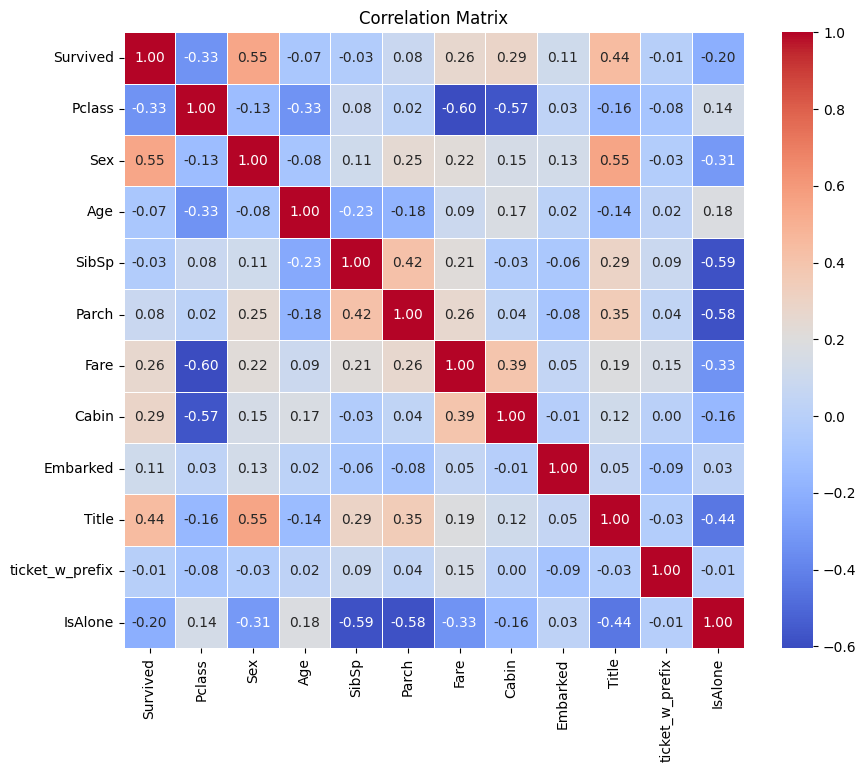

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = train_.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# KNN

In [56]:
def knn_classifier(df, test_df, label_column, n_neighbors=5):
    # Separate features and labels
    X = df.drop(columns=[label_column])
    y = df[label_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    test_pred = knn.predict(test_df.values)
    
    return test_pred, accuracy


neighbours = [3,5,7,10,15,20,25]
max_accuracy = 0
KNN_pred = None
for neighbor in neighbours:
    pred, accuracy = knn_classifier(train_, test_,'Survived', n_neighbors=neighbor)
    if accuracy > max_accuracy:
        KNN_pred = pred
        max_accuracy = accuracy
    
print("KNN:", KNN_pred)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       160
           1       0.76      0.69      0.73       107

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       160
           1       0.84      0.72      0.77       107

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       160
           1       0.82      0.70      0.76       107

    accuracy                           0.82       267
   macro avg  

# DECISION TREE CLASSIFIER

In [57]:
def decision_tree_classifier(df, test_df, label_column):
    # Separate features and labels
    X = df.drop(columns=[label_column])
    y = df[label_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and train the Decision Tree classifier
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dt.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Decision Tree Accuracy: {accuracy:.2f}")
    print("Decision Tree Classification Report:")
    print(report)
    
    test_pred = dt.predict(test_df.values)
    
    return test_pred, accuracy

DT_pred, accuracy = decision_tree_classifier(train_, test_, 'Survived')

print("DT:", DT_pred)

Decision Tree Accuracy: 0.78
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       160
           1       0.73      0.70      0.71       107

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267

DT: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

# RANDOM FOREST CLASSIFIER

In [58]:
def random_forest_classifier(df, test_df, label_column, n_estimators=100):
    # Separate features and labels
    X = df.drop(columns=[label_column])
    y = df[label_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=40)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Random Forest Accuracy: {accuracy:.2f}")
    print("Random Forest Classification Report:")
    print(report)
    
    pred = rf.predict(test_df.values)
    
    return pred, accuracy

estimators = [25,50,75,100,125,150,200]
max_accuracy = 0
RF_pred = None

for neighbor in neighbours:
    pred, accuracy = random_forest_classifier(train_, test_, 'Survived')
    if accuracy > max_accuracy:
        RF_pred = pred
        max_accuracy = accuracy
print("RF_pred:", RF_pred)

Random Forest Accuracy: 0.83
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       160
           1       0.81      0.74      0.77       107

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

Random Forest Accuracy: 0.83
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       160
           1       0.81      0.74      0.77       107

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

Random Forest Accuracy: 0.83
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       160
           1       0.81      0.74      

# DEEP NN

In [59]:
#Now we have confirmed that we have no more NaN values. We start scaling each column.
#Convert each column to be scaled to float datatype, to prevent rounding errors.


columns_to_scale = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Cabin']
train_[columns_to_scale] = train_[columns_to_scale].astype(float)

means = train_[columns_to_scale].mean()
stds = train_[columns_to_scale].std()
train_[columns_to_scale] = (train_[columns_to_scale] - means) / stds



means = test_[columns_to_scale].mean()
stds = test_[columns_to_scale].std()
test_[columns_to_scale] = (test_[columns_to_scale] - means) / stds

In [60]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.labels[idx]
        return x, y


In [61]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# THIS FUNCTION WORKS FINE
def create_loaders(df, feature_inputs, feature_output):

    train_loader_list = []
    test_loader_list = []
    
    for cols in feature_inputs:
        temp_df = df.copy()
        
        features = temp_df[cols]
        labels = temp_df[feature_output]
        
        
        features_np = features.values.astype(np.float32)
        labels_np = labels.values.astype(np.float32)
        



        X_train, X_test, y_train, y_test = train_test_split(features_np, labels_np, test_size=0.2, random_state=42)
        train_dataset = CustomDataset(X_train, y_train)
        test_dataset = CustomDataset(X_test, y_test)

        batch_size = 16 # Number of samples per mini-batch
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        train_loader_list.append(train_loader)
        test_loader_list.append(test_loader)
        
    return train_loader_list, test_loader_list



In [62]:


class model(nn.Module):
    def __init__(self, no_features = 11, no_hidden_neurons = 128, no_labels = 1, p = 0.2):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            #input layer
            nn.Linear(no_features, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
    
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
                 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
 
            
            #3rd layer
            nn.Linear(no_hidden_neurons, no_labels),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.float() 
        logits = self.mlp_stack(x)
        
        return logits




class model_two(nn.Module):
    def __init__(self, no_features = 11, no_hidden_neurons = 256, no_labels = 1, p = 0.2):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            #input layer
            nn.Linear(no_features, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #2nd layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #3rd layer
            nn.Linear(no_hidden_neurons, no_labels),
            nn.Sigmoid(),
        )

    def forward(self, x):        
        x = x.float() 
        logits = self.mlp_stack(x)
        
        return logits



class model_three(nn.Module):
    def __init__(self, no_features = 11, no_hidden_neurons = 64, no_labels = 1, p = 0.2):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            #input layer
            nn.Linear(no_features, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #2nd layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #3rd layer
            nn.Linear(no_hidden_neurons, no_labels),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.float() 
        logits = self.mlp_stack(x)
        
        return logits




In [63]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0.01):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False




In [64]:
def train(model, criterion, optimizer, train_loader, test_loader, num_epochs=10000):
    model.train()
    early_stopper = EarlyStopper(patience=30)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            outputs = outputs.float() 
            loss = criterion(outputs.squeeze(), labels.float().squeeze())  # `squeeze` to match output shape
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Calculate average training loss for the epoch
        epoch_loss = running_loss / len(train_loader)
        
        # Evaluate on the test set
        model.eval()  # Set model to evaluation mode
        validation_loss = 0.0
        with torch.no_grad():  # Disable gradient computation
            for inputs, labels in test_loader:
                outputs = model(inputs)
                outputs = outputs.float()
                loss = criterion(outputs.squeeze(), labels.float().squeeze())
                validation_loss += loss.item()
        
        # Calculate average validation loss for the epoch
        validation_loss /= len(test_loader)
        
        # Print loss every 50 epochs
        if epoch % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Validation Loss: {validation_loss:.4f}')
        
        # Check for early stopping based on validation loss
        if early_stopper.early_stop(validation_loss):  
            print(f'Early stopping at epoch {epoch+1} with validation loss {validation_loss:.4f}')
            break
        
        model.train()  # Set model back to training mode for next epoch


In [65]:
def evaluate(model, data_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in data_loader:
            outputs = model(inputs)
            predicted = (outputs.squeeze() > 0.5).float()  # Convert probabilities to binary predictions

            total += labels.size(0)
            correct += (predicted == labels.squeeze()).sum().item()

        accuracy = 100 * correct / total
        print(f'Accuracy: {accuracy:.2f}%')

        
    return accuracy


In [66]:
columns = train_.drop(columns=[ 'Survived']).columns


feature_inputs = [columns, columns, columns]
feature_output = ['Survived']
train_loader_list, test_loader_list = create_loaders(train_, feature_inputs, feature_output)

In [67]:

def model_trainer(model_list,train_loader_list, test_loader_list):
    accuracy_list = []
    
    for idx, model in enumerate(model_list):
        train_loader = train_loader_list[idx]
        test_loader = test_loader_list[idx]
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters())
        train(model, criterion, optimizer, train_loader, test_loader)
        model.eval()
        accuracy = evaluate(model, test_loader)  
        accuracy_list.append(accuracy)
        
        model_list[idx] = model
    
    return model_list, sum(accuracy_list)/ len(accuracy_list)

In [68]:
def get_predictions(model_list, feature_inputs, test):
    pred_list = []
    
    for idx, model in enumerate(model_list):
        temp_df = test.copy()
        temp_df = temp_df[feature_inputs[idx]]
        
        rows_with_nan = temp_df[temp_df.isna().any(axis=1)]
        features_np = temp_df.values
        
        # Convert to PyTorch tensor
        features_tensor = torch.tensor(features_np, dtype=torch.float32)
        model.eval()
        output = model(features_tensor)


        #Free up GPU
        model = model.cpu()     
        pred_list.append(output)
    
    return pred_list


        
    
        
        

In [69]:
#Sanity check.
# Show rows with any NaN values
rows_with_nan = test_[test_.isna().any(axis=1)]
print("Rows with NaN values:\n", rows_with_nan)


Rows with NaN values:
 Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked, Title, ticket_w_prefix, IsAlone]
Index: []


In [70]:
accuracy = 0
iteration = 0
max_accuracy = 0
pred_list = None


while accuracy < 87 and iteration < 10:
    iteration +=1
    
    model_1 = None
    model_2 = None
    model_3 = None
    
    model_1 = model()
    model_2 = model_two()
    model_3 = model_three()

    model_list = [model_1, model_2, model_3]
    model_list, accuracy = model_trainer(model_list, train_loader_list, test_loader_list)
    print()
    print()
    print()
    print("Current iteration: ", iteration)
    print("Current accuracy: ", accuracy)
    
    print()
    print()
    print()
    
    if accuracy > max_accuracy:
        pred_list = get_predictions(model_list, feature_inputs, test_)
        max_accuracy = accuracy
        
    
    del model_1
    del model_2
    del model_3
    



Epoch [1/10000], Train Loss: 0.6365, Validation Loss: 0.5942
Early stopping at epoch 35 with validation loss 0.4586
Accuracy: 84.27%
Epoch [1/10000], Train Loss: 0.5941, Validation Loss: 0.4863
Early stopping at epoch 33 with validation loss 0.5245
Accuracy: 83.71%
Epoch [1/10000], Train Loss: 0.6579, Validation Loss: 0.6464
Early stopping at epoch 38 with validation loss 0.4373
Accuracy: 84.27%



Current iteration:  1
Current accuracy:  84.08239700374531



Epoch [1/10000], Train Loss: 0.6398, Validation Loss: 0.5592
Early stopping at epoch 37 with validation loss 0.5472
Accuracy: 83.15%
Epoch [1/10000], Train Loss: 0.6108, Validation Loss: 0.4721
Early stopping at epoch 33 with validation loss 0.4954
Accuracy: 83.71%
Epoch [1/10000], Train Loss: 0.6594, Validation Loss: 0.6425
Early stopping at epoch 41 with validation loss 0.4295
Accuracy: 83.71%



Current iteration:  2
Current accuracy:  83.52059925093634



Epoch [1/10000], Train Loss: 0.6423, Validation Loss: 0.5546
Early stopp

# Model selection between KNN, DescisionTree, RandomForest and DNN. 
- It seems that DNN performs best.
- we will use an ensemble model on the DNN for even higher accuracy.
- note that the model architecture between the 3 models have been modified to make sure they are not symmetrical.

# Choosing between 'weighted voting'/'majority voting'
- Evaluated in tthe previous notebook, majority voting performs better (method_1)
- Also tried including the Decision Tree, KNN and RandomForest model in the ensemble model but test accuracy is worse when they are included.

In [71]:
#Method 1!
# def method_1(output, output2, output3, output4, output5):
#     pred1 = (output.squeeze() > 0.5).float()
#     pred2 = (output2.squeeze() > 0.5).float()
#     pred3 = (output3.squeeze() > 0.5).float()
#     pred4 = torch.tensor(output4)
#     pred5 = torch.tensor(output5)
    
#     predictions = torch.stack([pred1, pred2, pred3, pred4, pred5])

#     # Perform majority voting
#     majority_vote = torch.sum(predictions, dim=0) >= 2  # 2 or more votes for class 1

#     # Convert majority vote to float (if needed)
#     majority_vote = majority_vote.float()
    
#     return majority_vote


def method_1(output, output2, output3):
    pred1 = (output.squeeze() > 0.5).float()
    pred2 = (output2.squeeze() > 0.5).float()
    pred3 = (output3.squeeze() > 0.5).float()
    
    predictions = torch.stack([pred1, pred2, pred3])

    # Perform majority voting
    majority_vote = torch.sum(predictions, dim=0) >= 2  # 2 or more votes for class 1

    # Convert majority vote to float (if needed)
    majority_vote = majority_vote.float()
    
    return majority_vote

In [72]:
def method_2(output, output2, output3):
    pred1 = output.squeeze() 
    pred2 = output2.squeeze() 
    pred3 = output3.squeeze()

    # Sum the predictions and calculate the average
    majority_vote = (pred1 + pred2 + pred3) / 3

    # Apply threshold to get the final prediction (0 or 1)
    majority_vote = (majority_vote >= 0.5).float()
    
    return majority_vote


In [73]:
# majority_vote = method_1(pred_list[0],pred_list[1],pred_list[2], RF_pred, KNN_pred)
majority_vote = method_1(pred_list[0],pred_list[1],pred_list[2])

In [74]:
majority_vote_np = majority_vote.cpu().numpy()
test['Survived'] = majority_vote_np
submission = test[['Survived', 'PassengerId']]
submission

,Survived,PassengerId
0,0.0,892
1,0.0,893
2,0.0,894
3,0.0,895
4,1.0,896
...,...,...
413,0.0,1305
414,1.0,1306
415,0.0,1307
416,0.0,1308


In [75]:
submission_2 = pd.DataFrame()
submission_2['PassengerId'] = submission['PassengerId']
submission_2['Survived'] = submission['Survived']
submission_2

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [76]:
submission_2['Survived'] = submission_2['Survived'].astype(int)

In [77]:
submission_2.to_csv('predictions.csv', index=False)